In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [2]:
df1= pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv")


In [3]:
datasets = [df1,df2,df3,df4,df5,df6,df7,df8]

In [4]:
print("Different type of Attacks on Server")
for index, dataset in enumerate(datasets):
    print(f"{index}: {dataset[' Label'].unique()}")

Different type of Attacks on Server
0: ['BENIGN' 'DDoS']
1: ['BENIGN' 'PortScan']
2: ['BENIGN' 'Bot']
3: ['BENIGN']
4: ['BENIGN' 'Infiltration']
5: ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
6: ['BENIGN' 'FTP-Patator' 'SSH-Patator']
7: ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [5]:
df=pd.concat([df1,df2,df3,df5,df6,df7,df8],join="inner")


In [6]:
df[" Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [7]:
x = df[" Label"]

In [8]:
len(x)

2300825

In [9]:
df = df.dropna()

In [10]:
df.shape

(2299531, 79)

In [11]:
x = df[" Label"]

In [12]:
x

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2299531, dtype: object

In [13]:
arr = x

In [14]:
x.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
conditions = [
    df[' Label'].isin(["DDoS", "DoS slowloris", "DoS Slowhttptest", "DoS Hulk", "DoS GoldenEye"]),
    df[' Label'].isin(["Web Attack � Brute Force", "Web Attack � XSS", "Web Attack � Sql Injection"]),
    df[' Label'].isin(['FTP-Patator', 'SSH-Patator']),
]

choices = ['DosFam', 'WebAttack', 'Patator']


df[' Label'] = np.select(conditions, choices, default=df[' Label'])


df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [16]:
df[' Label'].unique()

array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

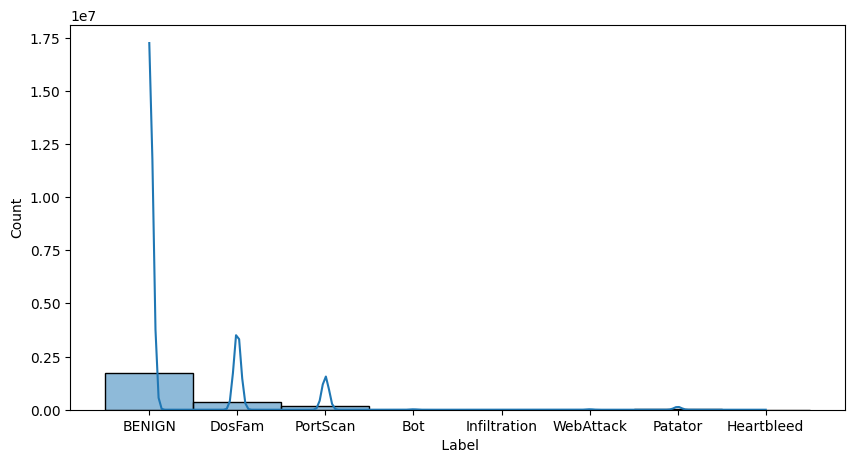

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x=" Label",kde=True)

<Axes: xlabel=' Label', ylabel='count'>

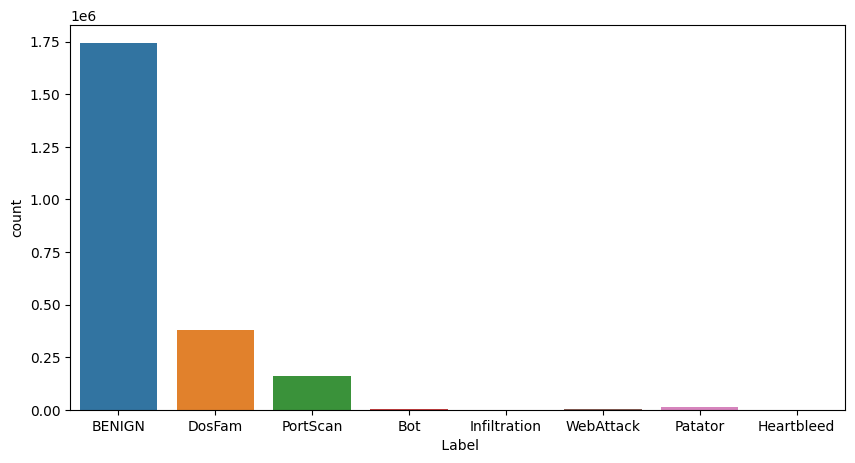

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x=" Label")

In [19]:
label_percentages = df[' Label'].value_counts(normalize=True) * 100
print(label_percentages)

 Label
BENIGN          75.790846
DosFam          16.513759
PortScan         6.911409
Patator          0.601644
WebAttack        0.094802
Bot              0.085496
Infiltration     0.001566
Heartbleed       0.000478
Name: proportion, dtype: float64


In [20]:
df_attack = df.copy()

In [21]:
df[' Label'].unique()

array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

In [ ]:
import numpy as np

cond = [
    df_attack[' Label'].isin(["DosFam", "PortScan", "Patator", "WebAttack", "Bot","Infiltration","Heartbleed"]),
]

choic = ['Attack']

df_attack[' Label'] = np.select(cond, choic, default=df_attack[' Label'])

df_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

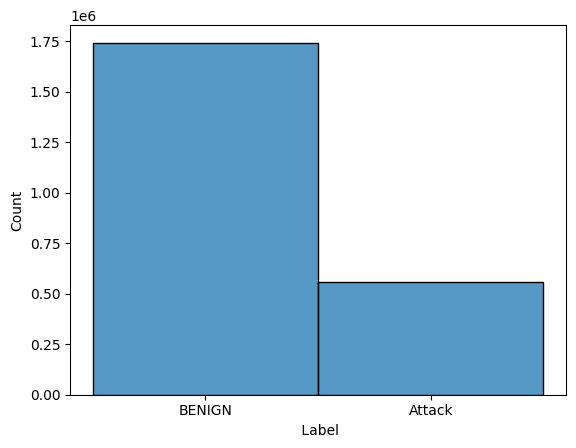

In [23]:
sns.histplot(data=df_attack,x=" Label")

In [24]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

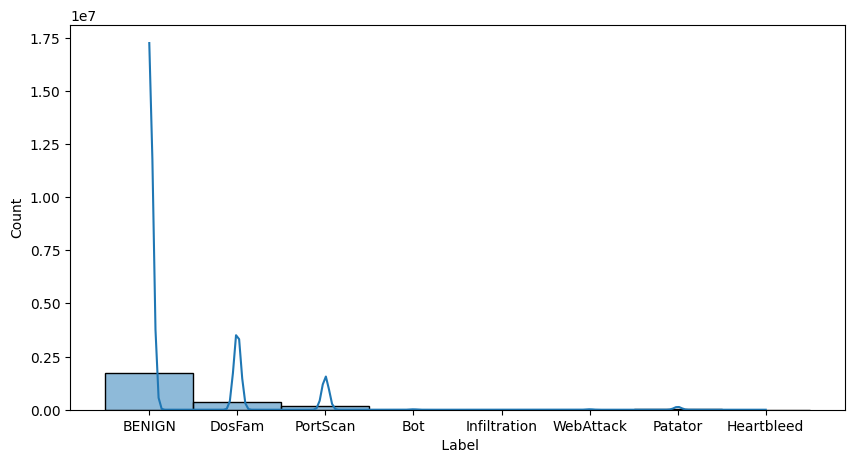

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x=" Label",kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

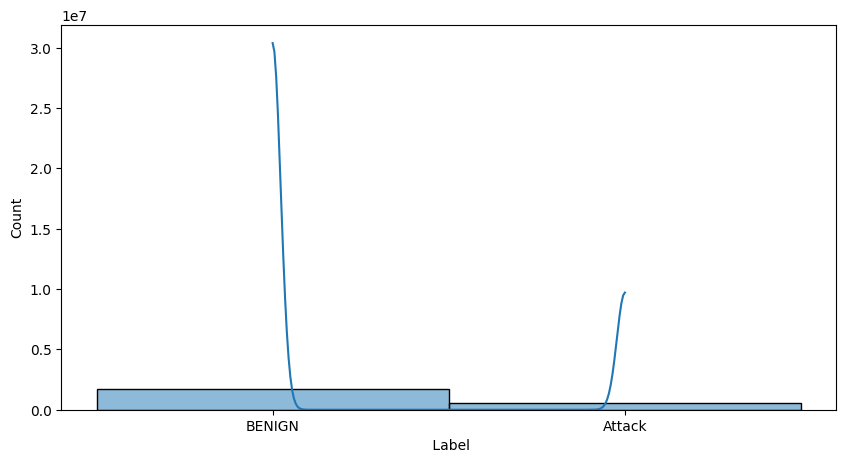

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_attack,x=" Label",kde=True)

In [27]:
print(df_attack[" Label"].isna().sum())

0


In [28]:
df_attack.replace([np.inf, -np.inf], np.nan, inplace=True)

In [29]:
df_attack

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(df_attack[' Label'])

print("Encoded Labels:", encoded_labels)

original_labels = label_encoder.inverse_transform(encoded_labels)

print("Original Labels:", original_labels)
df_attack[' Label'] =encoded_labels

Encoded Labels: [1 1 1 ... 1 1 1]
Original Labels: ['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']


In [31]:
df_attack[' Label'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


numeric_columns = df_attack.drop([' Label'],axis=1).columns
df_attack[numeric_columns] = scaler.fit_transform(df_attack[numeric_columns])

print("Dataset after Standardization:")
df_attack.head()

Dataset after Standardization:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.717684,-0.456677,-0.009998,-0.010646,-0.050716,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
1,2.728523,-0.456674,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
2,2.728580,-0.456675,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
3,2.222795,-0.456676,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
4,2.717569,-0.456677,-0.009998,-0.010646,-0.050716,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1


In [33]:
df_attack = df_attack.dropna()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = df_attack.drop([" Label"],axis=1)
y = df_attack[" Label"]
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(df_attack.drop([" Label"],axis=1))
print("Number of components chosen:", pca.n_components_)
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)


Number of components chosen: 25


In [35]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Activation
model = Sequential(
    [
        Dense(64,input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(16),
        BatchNormalization(),
        Activation('tanh'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,041 (11.88 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 160 (640.00 B)

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/20


I0000 00:00:1740250432.103216      67 service.cc:145] XLA service 0x7e1d8c006930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740250432.103273      67 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  94/6436 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7003 - loss: 0.5839

I0000 00:00:1740250435.730672      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6436/6436 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9074 - loss: 0.2201 - val_accuracy: 0.9533 - val_loss: 0.1112
Epoch 2/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9411 - loss: 0.1423 - val_accuracy: 0.9550 - val_loss: 0.1010
Epoch 3/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9436 - loss: 0.1332 - val_accuracy: 0.9557 - val_loss: 0.1062
Epoch 4/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9453 - loss: 0.1291 - val_accuracy: 0.9572 - val_loss: 0.0989
Epoch 5/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9466 - loss: 0.1262 - val_accuracy: 0.9590 - val_loss: 0.1028
Epoch 6/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9470 - loss: 0.1246 - val_accuracy: 0.9547 - val_loss: 0.1033
Epoch 7/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9472 - loss: 0.1238 - val_accuracy: 0.9490 - val_loss: 0.1136
Epoch 8/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9476 - loss: 0.1221 - val

In [39]:
y_p = model.predict(X_test)

21548/21548 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


In [40]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p = dt.predict(X_test)

In [41]:
y_p = model.predict(X_test)

21548/21548 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


In [42]:
class_predictions = (y_p >= 0.5).astype(int)


In [43]:
class_predictions

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [44]:
y_test

148381    0
295349    1
636529    1
472228    1
356340    1
         ..
253495    0
163627    1
190502    1
107445    0
19844     0
Name:  Label, Length: 689519, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test,class_predictions))

[[145819  21148]
 [  9941 512611]]


In [46]:
y_p = np.argmax(y_p)

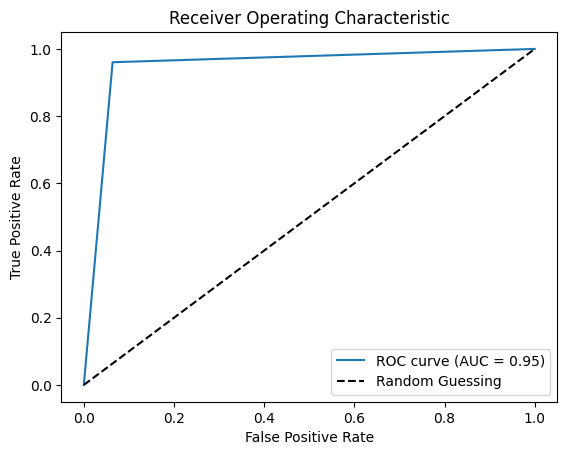

In [ ]:
y_p = dt.predict(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(class_predictions, y_test)


auc = roc_auc_score(class_predictions, y_test)


plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [48]:
from joblib import dump
dump(scaler,'scaler.joblib')
dump(pca,'pca.joblib')
model.save('model.h5')

In [49]:
y_train

226862    0
504401    1
24178     1
167388    1
8355      1
         ..
266213    1
126543    0
200236    1
249360    1
153520    1
Name:  Label, Length: 1608876, dtype: int64

In [50]:
y_test

148381    0
295349    1
636529    1
472228    1
356340    1
         ..
253495    0
163627    1
190502    1
107445    0
19844     0
Name:  Label, Length: 689519, dtype: int64

In [51]:
filtered_df = df_attack[df_attack[' Label'] == 0]


In [52]:
filtered_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,-0.424337,-0.419298,-0.008595,-0.003297,-0.049405,-0.001930,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18884,-0.424337,-0.328940,-0.007193,-0.010646,-0.049592,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18885,-0.424337,-0.425373,-0.008595,-0.004347,-0.049405,-0.001933,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18886,-0.424337,1.855562,-0.001582,-0.006447,-0.046595,-0.001933,-0.250109,-0.284113,-0.262599,-0.216968,...,0.002182,-0.126392,-0.103604,-0.150299,-0.102295,1.178638,8.730398,2.325245,-0.036798,0
18887,-0.424337,-0.438110,-0.008595,-0.004347,-0.049405,-0.001930,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0


In [53]:
filtered = filtered_df.head(10)

In [54]:
filtered.to_csv('filtered.csv', index=False)


In [55]:
t = pd.read_csv('filtered.csv')

In [56]:
t.shape

(10, 79)

In [57]:
t = t.drop([" Label"],axis=1)

In [ ]:
import joblib
import tensorflow as tf
scaler = joblib.load("scaler.joblib")
pca = joblib.load("pca.joblib")


model = tf.keras.models.load_model("model.h5")

In [ ]:

    

data_pca = pca.transform(t)
    

predictions = model.predict(data_pca)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


In [60]:
predictions

array([[3.3289276e-02],
       [4.8328847e-01],
       [5.0610438e-02],
       [2.9961491e-04],
       [9.7720800e-03],
       [1.1917136e-03],
       [9.6224444e-03],
       [1.4775869e-04],
       [1.1943044e-03],
       [1.5970623e-03]], dtype=float32)

In [61]:
class_predictions = (predictions >= 0.5).astype(int)


In [62]:
class_predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])